### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import reshape
from scipy.stats.mstats import normaltest

In [25]:
#Reading data from remote link
filepath = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(filepath)

In [26]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


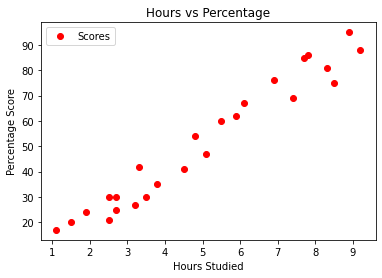

In [27]:
#Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o', color='r')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

LAM :  0.30823808994473056


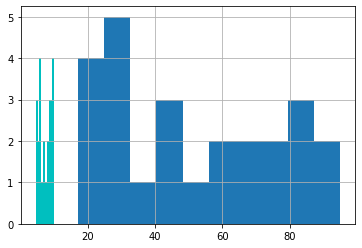

NormaltestResult(statistic=8.81819950875115, pvalue=0.012166125903033578)


In [28]:
from scipy.stats import boxcox
bc_result = boxcox(data.Scores)
boxcox_score = bc_result[0]
lam = bc_result[1]

print("LAM : ", lam)
data['Scores'].hist();
plt.hist(boxcox_score, color = 'c');
plt.show()
normal = normaltest(boxcox_score)
print(normal)


In [29]:
Y = data['Scores']
X = data['Hours']

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

In [31]:
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)
X_train_reshaped = X_train.values.reshape(-1,1)
X_test_reshaped = X_test.values.reshape(-1,1)
print("\nX_train shape: ", X_train_reshaped.shape)
print("X_test shape: ",X_test_reshaped.shape)
print("y_test shape: ",y_test_reshaped.shape)
print("y_train shape: ",y_train_reshaped.shape)


X_train shape:  (20, 1)
X_test shape:  (5, 1)
y_test shape:  (5, 1)
y_train shape:  (20, 1)


In [33]:
LR = LinearRegression()
LR.fit(X_train_reshaped, y_train_reshaped)


LinearRegression()

In [37]:
from sklearn.metrics import accuracy_score
lr_pred = LR.predict(X_test_reshaped)
#print("LR SHAPE", lr_pred.shape)
print(lr_pred)
print("\n LR r2_score : ",r2_score(y_test_reshaped, lr_pred))

[[ 9.97026179]
 [32.98470004]
 [18.33914843]
 [87.38246316]
 [48.67636248]]

 LR r2_score :  0.8421031525243527


In [39]:
lr_pred = LR.predict([[9.25]])
print("If a student studies for the given hours, he/she will Score : ", lr_pred)

If a student studies for the given hours, he/she will Score :  [[95.22829438]]
